In [1]:
import os
import functools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

import pynhm.pynhm as pynhm
import pynhm.prms5util as prms5util

In [2]:
wbal_df = prms5util.load_wbl_output("../prms_models/box01")
wbal_df

,soilzone_water_bal,soilzone_bsmbal,soilzone_last_sm,soilzone_soilmoist,soilzone_last_stor,soilzone_ss_stor,soilzone_perv_et,soilzone_sz2gw,soilzone_interflow,soilzone_soil2gw,...,gwflow_water_bal,gwflow_last_store,gwflow_gwr_store,gwflow_gw_input,gwflow_gw_flow,gwflow_gw_sink,gwflow_gw,gwflow_upslope,gwflow_minarea_in,gwflow_downflow
Date,,,,,,,,,,,,,,,,,,,,,
1980-10-01,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,...,0.0,2.00000,1.94485,0.00000,-0.05515,-0.0,NaN,0.0,0.0,-0.0
1980-10-02,0.0,-0.0,0.00000,0.09273,0.00000,0.00000,-0.01027,-0.00000,-0.00000,-0.00000,...,-0.0,1.94485,1.89121,0.00000,-0.05363,-0.0,NaN,0.0,0.0,-0.0
1980-10-03,0.0,0.0,0.09273,0.32037,0.00000,0.00000,-0.03510,-0.00000,-0.00000,-0.00000,...,0.0,1.89121,1.83906,0.00000,-0.05215,-0.0,NaN,0.0,0.0,-0.0
1980-10-04,0.0,0.0,0.32037,0.34967,0.00000,0.00000,-0.03790,-0.00000,-0.00000,-0.00000,...,0.0,1.83906,1.78834,0.00000,-0.05072,-0.0,NaN,0.0,0.0,-0.0
1980-10-05,-0.0,-0.0,0.34967,0.31598,0.00000,0.00000,-0.03369,-0.00000,-0.00000,-0.00000,...,0.0,1.78834,1.73903,0.00000,-0.04932,-0.0,NaN,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-0.0,-0.0,1.54931,1.48013,0.02083,0.01775,-0.06918,-0.00285,-0.00024,-0.00000,...,0.0,0.41149,0.40291,0.00285,-0.01143,-0.0,NaN,0.0,0.0,-0.0
2019-12-28,-0.0,-0.0,1.48013,1.41081,0.01775,0.01521,-0.06932,-0.00235,-0.00018,-0.00000,...,-0.0,0.40291,0.39409,0.00235,-0.01118,-0.0,NaN,0.0,0.0,-0.0
2019-12-29,-0.0,-0.0,1.41081,2.07781,0.01521,0.01310,-0.06949,-0.00196,-0.00015,-0.00000,...,-0.0,0.39409,0.38513,0.00196,-0.01092,-0.0,NaN,0.0,0.0,-0.0


In [3]:
wbal_df.columns

Index(['soilzone_water_bal', 'soilzone_bsmbal', 'soilzone_last_sm',
       'soilzone_soilmoist', 'soilzone_last_stor', 'soilzone_ss_stor',
       'soilzone_perv_et', 'soilzone_sz2gw', 'soilzone_interflow',
       'soilzone_soil2gw', 'soilzone_dunnian', 'soilzone_soil_in',
       'soilzone_lakeinsz', 'soilzone_downflow', 'soilzone_swale_et',
       'soilzone_pref_flow', 'soilzone_pfr_dunn', 'soilzone_pfr_stor',
       'soilzone_slow_stor', 'soilzone_dunnian_gvr', 'soilzone_lake_evap',
       'intcp_water_bal', 'intcp_precip', 'intcp_netppt', 'intcp_intcpevap',
       'intcp_intcpstor', 'intcp_last_stor', 'intcp_changeover',
       'intcp_net_apply', 'intcp_apply', 'srunoff_smidx_water_bal',
       'srunoff_smidx_robal', 'srunoff_smidx_sroff', 'srunoff_smidx_infil',
       'srunoff_smidx_impervevap', 'srunoff_smidx_impervstor',
       'srunoff_smidx_dprst_evap', 'srunoff_smidx_dprst_seep',
       'srunoff_smidx_perv_sro', 'srunoff_smidx_imperv_sro',
       'srunoff_smidx_dprst_sro', 'sru

# Load PRMS5 Input and Output Files for NHM Basin

In [4]:
input_data_path = "../prms_models/box01/input"
output_data_path = "../prms_models/box01/output"

In [5]:
input_data_path
datanames = ["precipitation", "temp_min", "temp_max"]
filenames = ["prcp.cbh", "tmin.cbh", "tmax.cbh"]
input_df = prms5util.load_prms_input(input_data_path, datanames, filenames)
input_df

Loading ../prms_models/box01/input/prcp.cbh
Loading ../prms_models/box01/input/tmin.cbh
Loading ../prms_models/box01/input/tmax.cbh


,date,precipitation,temp_min,temp_max
0,1979-01-01,0.00,31.0,43.6
1,1979-01-02,0.04,31.0,47.2
2,1979-01-03,0.02,34.1,53.0
3,1979-01-04,0.49,38.2,53.7
4,1979-01-05,0.48,34.9,42.9
...,...,...,...,...
14977,2019-12-27,0.00,34.2,50.6
14978,2019-12-28,0.00,29.1,48.3
14979,2019-12-29,0.76,29.6,41.8
14980,2019-12-30,0.82,34.6,39.6


In [6]:
# load prms output
csvfiles = [f for f in os.listdir(output_data_path) if f.endswith(".csv")]
csvfiles.remove("stats.csv")
output_df = prms5util.load_prms_output(output_data_path, csvfiles)
output_df

,date,soil_moist_tot,hru_impervstor,net_snow,net_ppt,hru_sroffp,hru_snow,tmaxf,hortonian_flow,tminf,intcp_stor,canopy_covden,net_rain,intcp_evap,hru_ppt,hru_sroffi,hru_rain,soil_moist_ante,hru_impervevap
0,1980-10-01,0.000000,0.0,0.0,0.000000,0.000000,0.0,71.098717,0.000000,69.633911,0.000000,0.230835,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,1980-10-02,0.092735,0.0,0.0,0.103031,0.000027,0.0,71.098717,0.000027,69.633911,0.003847,0.230835,0.103031,0.000000,0.103919,0.0,0.103919,0.000000,0.0
2,1980-10-03,0.320372,0.0,0.0,0.262855,0.000116,0.0,71.098717,0.000116,69.633911,0.003847,0.230835,0.262855,0.000000,0.262855,0.0,0.262855,0.092735,0.0
3,1980-10-04,0.349669,0.0,0.0,0.067242,0.000043,0.0,71.098717,0.000045,69.633911,0.003847,0.230835,0.067242,0.000000,0.067242,0.0,0.067242,0.320372,0.0
4,1980-10-05,0.315975,0.0,0.0,0.000000,0.000000,0.0,71.098717,0.000000,69.633911,0.000000,0.230835,0.000000,0.003847,0.000000,0.0,0.000000,0.349669,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14331,2019-12-27,1.497882,0.0,0.0,0.000000,0.000000,0.0,69.326889,0.000000,70.423889,0.000000,0.230835,0.000000,0.000000,0.000000,0.0,0.000000,1.549313,0.0
14332,2019-12-28,1.426021,0.0,0.0,0.000000,0.000000,0.0,69.326889,0.000000,70.423889,0.000000,0.230835,0.000000,0.000000,0.000000,0.0,0.000000,1.480134,0.0
14333,2019-12-29,2.090915,0.0,0.0,0.771318,0.034829,0.0,69.326889,0.208038,70.423889,0.003847,0.230835,0.771318,0.000000,0.772206,0.0,0.772206,1.410813,0.0
14334,2019-12-30,2.387826,0.0,0.0,0.833169,0.293684,0.0,69.326889,0.453236,70.423889,0.003847,0.230835,0.833169,0.000000,0.833169,0.0,0.833169,2.077811,0.0


In [7]:
# load the prms5 stats.csv file
fname = os.path.join(output_data_path, "stats.csv")
prms_stats_df = prms5util.load_prms_statscsv(fname)
prms_stats_df.columns

Index(['date', 'basin_potet', 'basin_actet', 'basin_dprst_evap',
       'basin_imperv_evap', 'basin_intcp_evap', 'basin_lakeevap',
       'basin_perv_et', 'basin_snowevap', 'basin_swrad', 'basin_ppt',
       'basin_pk_precip', 'basin_tmax', 'basin_tmin', 'basin_snowcov',
       'basin_total_storage', 'basin_surface_storage', 'basin_dprst_volcl',
       'basin_dprst_volop', 'basin_gwstor', 'basin_imperv_stor',
       'basin_intcp_stor', 'basin_lake_stor', 'basin_pweqv',
       'basin_soil_moist', 'basin_ssstor', 'basin_pref_stor', 'basin_slstor',
       'basin_soil_rechr', 'basin_capwaterin', 'basin_dprst_seep',
       'basin_gwin', 'basin_pref_flow_in', 'basin_recharge', 'basin_snowmelt',
       'basin_soil_to_gw', 'basin_sz2gw', 'basin_gwsink', 'basin_prefflow',
       'basin_slowflow', 'basin_hortonian', 'basin_dunnian', 'basin_stflow_in',
       'basin_stflow_out', 'basin_gwflow', 'basin_dnflow',
       'basin_gwstor_minarea_wb', 'basin_cfs', 'basin_gwflow_cfs',
       'basin_sroff_

In [8]:
prms_stats_df.loc[:, ["date", "basin_intcp_stor", "basin_intcp_evap"]]

,date,basin_intcp_stor,basin_intcp_evap
0,1980-10-01,0.0000,0.0000
1,1980-10-02,0.0009,0.0000
2,1980-10-03,0.0009,0.0000
3,1980-10-04,0.0009,0.0000
4,1980-10-05,0.0000,0.0009
...,...,...,...
14331,2019-12-27,0.0000,0.0000
14332,2019-12-28,0.0000,0.0000
14333,2019-12-29,0.0009,0.0000
14334,2019-12-30,0.0009,0.0000


# Run Python NHM

In [9]:
start_time = datetime.datetime(1980, 10, 1)
end_time = datetime.datetime(2019, 12, 31)
# end_time = datetime.datetime(1981, 10, 1)
delta_time = datetime.timedelta(days=1)
print(start_time, end_time)

1980-10-01 00:00:00 2019-12-31 00:00:00


In [10]:
# for now assume rainfall is the precipitation input
#date_mask = (input_df["date"] >= start_time) & (input_df["date"] <= end_time)
#rainfall = input_df.loc[date_mask, ["precipitation"]]
#rainfall = np.array(rainfall).flatten()
#rainfall

# assume that rainfall is the hru_ppt data in the NHM output
date_mask = (output_df["date"] >= start_time) & (output_df["date"] <= end_time)
rainfall = output_df.loc[date_mask, ["hru_ppt"]]
rainfall = np.array(rainfall).flatten()
rainfall

array([0.        , 0.1039193 , 0.2628547 , ..., 0.77220559, 0.83316916,
       0.1117666 ])

In [11]:
# for now provide potential ET as basin_potet prms output
date_mask = (prms_stats_df["date"] >= start_time) & (prms_stats_df["date"] <= end_time)
potential_evapotranspiration = prms_stats_df.loc[date_mask, ["basin_potet"]]
potential_evapotranspiration = np.array(potential_evapotranspiration).flatten()
potential_evapotranspiration.shape, potential_evapotranspiration

((14336,), array([0.1841, 0.1823, 0.1806, ..., 0.0695, 0.0697, 0.0699]))

In [12]:
prms_stats_df.columns

Index(['date', 'basin_potet', 'basin_actet', 'basin_dprst_evap',
       'basin_imperv_evap', 'basin_intcp_evap', 'basin_lakeevap',
       'basin_perv_et', 'basin_snowevap', 'basin_swrad', 'basin_ppt',
       'basin_pk_precip', 'basin_tmax', 'basin_tmin', 'basin_snowcov',
       'basin_total_storage', 'basin_surface_storage', 'basin_dprst_volcl',
       'basin_dprst_volop', 'basin_gwstor', 'basin_imperv_stor',
       'basin_intcp_stor', 'basin_lake_stor', 'basin_pweqv',
       'basin_soil_moist', 'basin_ssstor', 'basin_pref_stor', 'basin_slstor',
       'basin_soil_rechr', 'basin_capwaterin', 'basin_dprst_seep',
       'basin_gwin', 'basin_pref_flow_in', 'basin_recharge', 'basin_snowmelt',
       'basin_soil_to_gw', 'basin_sz2gw', 'basin_gwsink', 'basin_prefflow',
       'basin_slowflow', 'basin_hortonian', 'basin_dunnian', 'basin_stflow_in',
       'basin_stflow_out', 'basin_gwflow', 'basin_dnflow',
       'basin_gwstor_minarea_wb', 'basin_cfs', 'basin_gwflow_cfs',
       'basin_sroff_

<AxesSubplot:xlabel='Date'>

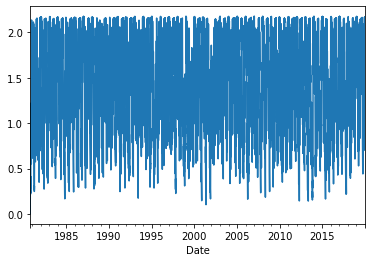

In [13]:
wbal_df["soilzone_last_sm"].plot()

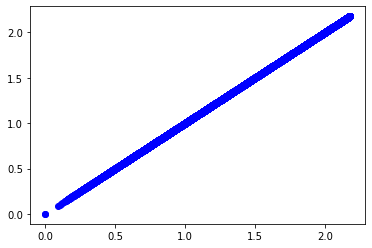

In [14]:
plt.plot(wbal_df["soilzone_last_sm"], output_df["soil_moist_ante"], "bo")

In [15]:
# for now provide previous soil moisture for runoff calculation
date_mask = (output_df["date"] >= start_time) & (output_df["date"] <= end_time)
soil_moisture0_in = output_df.loc[date_mask, ["soil_moist_ante"]].to_numpy().flatten()
soil_moisture0_in.shape, soil_moisture0_in

((14336,),
 array([0.        , 0.        , 0.09273492, ..., 1.41081345, 2.07781148,
        2.16862655]))

In [16]:
# run a pynhm run
from pynhm import pynhm

print("Initializing...")
#rainfall = [4.5, 0., 0., 0., 0.]
#potential_evapotranspiration = len(rainfall) * [1.]

# conversion factors
inch_to_meter = 0.0254
acre_to_meter_squared = 4046.8564224

# Assign input variables and convert to metric units
area = 1.0 * acre_to_meter_squared

# forcings
rainfall *= inch_to_meter
potential_evapotranspiration *= inch_to_meter

# interception
intcp_stor_max = 0.003847 * inch_to_meter
covden = 0.2308

# surface runoff
hru_percent_imperv = 0.0
imperv_stor_start = 0.0 * inch_to_meter
imperv_stor_max = 0.0500000 * inch_to_meter
carea_min = 0.0 # default
carea_max = 1.0
soil_rechr_max_frac = 0.8170124
smidx_coef = 0.0002278
smidx_exp = 1.2787037  # 1 / inch
smidx_exp = smidx_exp / inch_to_meter
soil_moisture0_in *= inch_to_meter

forcings = pynhm.AtmosphericForcings(
    rainfall, 
    potential_evapotranspiration
)

cnp = pynhm.Canopy(
    id=0, 
    area=area, 
    forcing=forcings,
    verbose=False,
    intcp_stor_start=0., 
    intcp_stor_max=intcp_stor_max, 
    covden=covden
)

sro = pynhm.SurfaceRunoff(
    id=1, 
    area=area, 
    forcing=forcings,
    verbose=False,
    hru_percent_imperv=hru_percent_imperv, 
    imperv_stor_start=imperv_stor_start,
    imperv_stor_max=imperv_stor_max,
    carea_min=carea_min,
    carea_max=carea_max,
    soil_rechr_max_frac=soil_rechr_max_frac,
    smidx_coef=smidx_coef,
    smidx_exp=smidx_exp,
    soil_moisture0_in=soil_moisture0_in,
)

# connect storage units
cnp.register_recipient(sro, "net_precipitation")

# create list of storage units in order of flow calculation
storage_units = [cnp, sro]

time_length = float(delta_time.days)
verbose = False
current_time = start_time
itime_step = 0
while current_time <= end_time:

    if verbose:
        print(f"processing {current_time} ...")

    forcings.advance(itime_step, current_time)

    for storage_unit in storage_units:
        storage_unit.advance(itime_step)

    for storage_unit in storage_units:
        storage_unit.calculate(time_length)

    if verbose:
        for storage_unit in storage_units:
            print(storage_unit.get_budget_summary_str())
        
    current_time += delta_time
    itime_step += 1
    
print("Finalizing...")
for storage_unit in storage_units:
    storage_unit.finalize()

Initializing...
Finalizing...


# Process Canopy Budget

In [17]:
# output for python version
cnp_df = pd.DataFrame(np.array(cnp.output_data), columns=cnp.output_column_names)
cnp_df

,date,precip,aet,intcp_ds,net_precip,residual,intcp_stor_new,intcp_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,10.68188,-0.0,-0.091266,-10.590614,-0.0,0.000098,0.0
2,1980-10-03,27.018874,-0.091266,-0.0,-26.927608,-0.0,0.000098,0.000098
3,1980-10-04,6.911805,-0.091266,-0.0,-6.820539,0.0,0.000098,0.000098
4,1980-10-05,0.0,-0.091266,0.091266,-0.0,0.0,0.0,0.000098
...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,79.375131,-0.0,-0.091266,-79.283865,0.0,0.000098,0.0
14334,2019-12-30,85.641586,-0.091266,-0.0,-85.55032,0.0,0.000098,0.000098


In [18]:
# calculate english equivalents for comparison with prms
conversion = [
    ("precip", 1. / area / inch_to_meter),
    ("aet", 1. / area / inch_to_meter),
    ("intcp_ds", 1. / area / inch_to_meter),
    ("net_precip", 1. / area / inch_to_meter),
    ("residual", 1. / area / inch_to_meter),
    ("intcp_stor_new", 1. / inch_to_meter),
    ("intcp_stor_old", 1. / inch_to_meter),
]
cnp_english_df = cnp_df.copy()
for name, conversion_factor in conversion:
    cnp_english_df[name] *= conversion_factor
cnp_english_df

,date,precip,aet,intcp_ds,net_precip,residual,intcp_stor_new,intcp_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,0.103919,-0.0,-0.000888,-0.103031,-0.0,0.003847,0.0
2,1980-10-03,0.262855,-0.000888,-0.0,-0.261967,-0.0,0.003847,0.003847
3,1980-10-04,0.067242,-0.000888,-0.0,-0.066354,0.0,0.003847,0.003847
4,1980-10-05,0.0,-0.000888,0.000888,-0.0,0.0,0.0,0.003847
...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,0.772206,-0.0,-0.000888,-0.771318,0.0,0.003847,0.0
14334,2019-12-30,0.833169,-0.000888,-0.0,-0.832281,0.0,0.003847,0.003847


In [19]:
# PRMS output
output_df.loc[:, ["date", "hru_ppt", "net_ppt", "intcp_stor", "intcp_evap"]]

,date,hru_ppt,net_ppt,intcp_stor,intcp_evap
0,1980-10-01,0.000000,0.000000,0.000000,0.000000
1,1980-10-02,0.103919,0.103031,0.003847,0.000000
2,1980-10-03,0.262855,0.262855,0.003847,0.000000
3,1980-10-04,0.067242,0.067242,0.003847,0.000000
4,1980-10-05,0.000000,0.000000,0.000000,0.003847
...,...,...,...,...,...
14331,2019-12-27,0.000000,0.000000,0.000000,0.000000
14332,2019-12-28,0.000000,0.000000,0.000000,0.000000
14333,2019-12-29,0.772206,0.771318,0.003847,0.000000
14334,2019-12-30,0.833169,0.833169,0.003847,0.000000


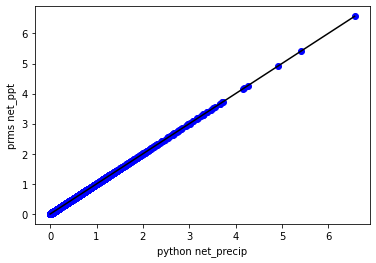

In [20]:
d1 = np.array(-cnp_english_df["net_precip"])
d2 = np.array(output_df["net_ppt"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python net_precip")
ax.set_ylabel("prms net_ppt")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

In [21]:
err = d2 - d1
print(err.min(), err.max(), err.mean())

-4.6239999829111866e-07 0.000887887600001136 0.0002253526851304559


Text(0, 0.5, 'net_ppt error (prms - python)')

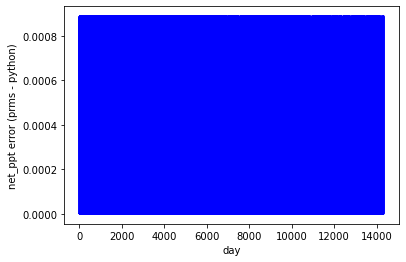

In [22]:
ax = plt.subplot(1, 1, 1)
ax.plot(err, 'b-')
ax.set_xlabel("day")
ax.set_ylabel("net_ppt error (prms - python)")

# Process Surface Runoff

In [23]:
# output for python version
sro_df = pd.DataFrame(np.array(sro.output_data), columns=sro.output_column_names)
sro_df

,date,net_precipitation,impervious_runoff,impervious_ds,impervious_et,pervious_runoff,infiltration,residual,impervious_stor_new,impervious_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,10.590614,-0.0,-0.0,-0.0,-0.002808,-10.587807,0.0,0.00127,0.0
2,1980-10-03,26.927608,-0.0,-0.0,-0.0,-0.011853,-26.915755,0.0,0.00127,0.00127
3,1980-10-04,6.820539,-0.0,-0.0,-0.0,-0.0044,-6.816139,0.0,0.00127,0.00127
4,1980-10-05,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.00127
...,...,...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,79.283865,-0.0,-0.0,-0.0,-3.580093,-75.703772,0.0,0.00127,0.0
14334,2019-12-30,85.55032,-0.0,-0.0,-0.0,-30.116268,-55.434051,0.0,0.00127,0.00127


In [24]:
# convert to english units for prms comparison
conversion = [
    ("net_precipitation", 1. / area / inch_to_meter),
    ("impervious_runoff", 1. / area / inch_to_meter),
    ("impervious_ds", 1. / area / inch_to_meter),
    ("impervious_et", 1. / area / inch_to_meter),
    ("pervious_runoff", 1. / area / inch_to_meter),
    ("infiltration", 1. / area / inch_to_meter),
    ("residual", 1. / area / inch_to_meter),
    ("impervious_stor_new", 1. / inch_to_meter),
    ("impervious_stor_old", 1. / inch_to_meter),
]
sro_english_df = sro_df.copy()
for name, conversion_factor in conversion:
    sro_english_df[name] *= conversion_factor
sro_english_df

,date,net_precipitation,impervious_runoff,impervious_ds,impervious_et,pervious_runoff,infiltration,residual,impervious_stor_new,impervious_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,0.103031,-0.0,-0.0,-0.0,-0.000027,-0.103004,0.0,0.05,0.0
2,1980-10-03,0.261967,-0.0,-0.0,-0.0,-0.000115,-0.261851,0.0,0.05,0.05
3,1980-10-04,0.066354,-0.0,-0.0,-0.0,-0.000043,-0.066311,0.0,0.05,0.05
4,1980-10-05,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,0.771318,-0.0,-0.0,-0.0,-0.034829,-0.736489,0.0,0.05,0.0
14334,2019-12-30,0.832281,-0.0,-0.0,-0.0,-0.292988,-0.539293,0.0,0.05,0.05


In [25]:
# PRMS output
output_df.loc[:, ["date", "net_ppt", "hru_sroffi", "hru_impervevap", "hru_impervstor", 
                  "hru_sroffp"]]

,date,net_ppt,hru_sroffi,hru_impervevap,hru_impervstor,hru_sroffp
0,1980-10-01,0.000000,0.0,0.0,0.0,0.000000
1,1980-10-02,0.103031,0.0,0.0,0.0,0.000027
2,1980-10-03,0.262855,0.0,0.0,0.0,0.000116
3,1980-10-04,0.067242,0.0,0.0,0.0,0.000043
4,1980-10-05,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
14331,2019-12-27,0.000000,0.0,0.0,0.0,0.000000
14332,2019-12-28,0.000000,0.0,0.0,0.0,0.000000
14333,2019-12-29,0.771318,0.0,0.0,0.0,0.034829
14334,2019-12-30,0.833169,0.0,0.0,0.0,0.293684


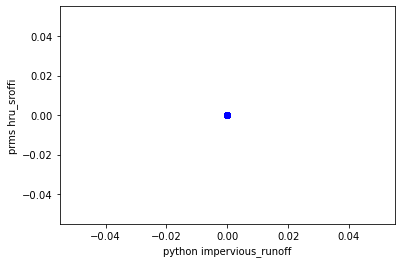

In [26]:
d1 = np.array(-sro_english_df["impervious_runoff"])
d2 = np.array(output_df["hru_sroffi"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python impervious_runoff")
ax.set_ylabel("prms hru_sroffi")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

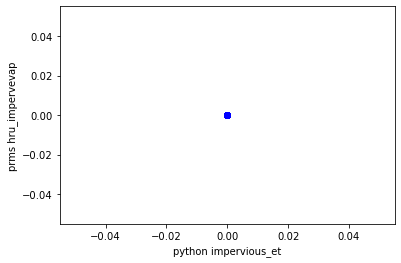

In [27]:
d1 = np.array(-sro_english_df["impervious_et"])
d2 = np.array(output_df["hru_impervevap"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python impervious_et")
ax.set_ylabel("prms hru_impervevap")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

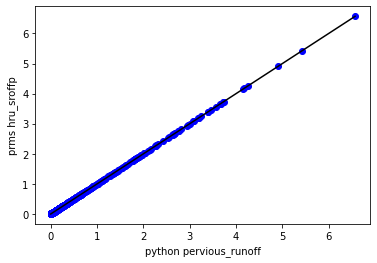

In [28]:
d1 = np.array(-sro_english_df["pervious_runoff"])
d2 = np.array(output_df["hru_sroffp"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python pervious_runoff")
ax.set_ylabel("prms hru_sroffp")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

In [29]:
err = d2 - d1
print(err.min(), err.max(), err.mean())

-1.3028035041884323e-06 0.004406032180731323 3.9880864203517136e-05


Text(0, 0.5, 'runoff error (prms - python)')

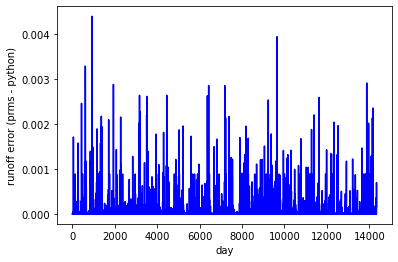

In [30]:
ax = plt.subplot(1, 1, 1)
ax.plot(err, 'b-')
ax.set_xlabel("day")
ax.set_ylabel("runoff error (prms - python)")

Text(0, 0.5, 'pervious runoff')

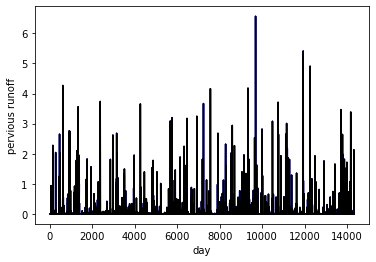

In [31]:
ax = plt.subplot(1, 1, 1)
ax.plot(d1, 'b')
ax.plot(d2, 'k')
ax.set_xlabel("day")
ax.set_ylabel("pervious runoff")